Testing Mushi
==

Here's a notebook for playing with the `mushi` module

In [1]:
%matplotlib notebook
import mushi
from mushi import PiecewiseConstantHistory, JointHistory, SFS
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit

API documentation
--

In [12]:
help(PiecewiseConstantHistory)
help(JointHistory)
help(SFS)

Help on class PiecewiseConstantHistory in module mushi:

class PiecewiseConstantHistory(builtins.object)
 |  PiecewiseConstantHistory(change_points: <built-in function array>, vals: numpy.ndarray) -> None
 |  
 |  The first epoch starts at zero, and the last epoch extends to infinity.
 |  Can be used for η or μ
 |  
 |  change_points: epoch change points (times)
 |  vals: vector of constant values for each epoch
 |  
 |  Methods defined here:
 |  
 |  __delattr__(self, name)
 |  
 |  __eq__(self, other) -> bool
 |      needed for hashability
 |  
 |  __hash__(self)
 |      needed for hashability
 |  
 |  __init__(self, change_points: <built-in function array>, vals: numpy.ndarray) -> None
 |  
 |  __post_init__(self)
 |  
 |  __repr__(self)
 |  
 |  __setattr__(self, name, value)
 |  
 |  m(self)
 |      number of epochs
 |  
 |  plot(self, **kwargs) -> None
 |      plot the history
 |      
 |      kwargs: key word arguments passed to plt.step
 |  
 |  --------------------------------

### Demographic history $\eta(t)$ and mutation rate history $\mu(t)$

<IPython.core.display.Javascript object>


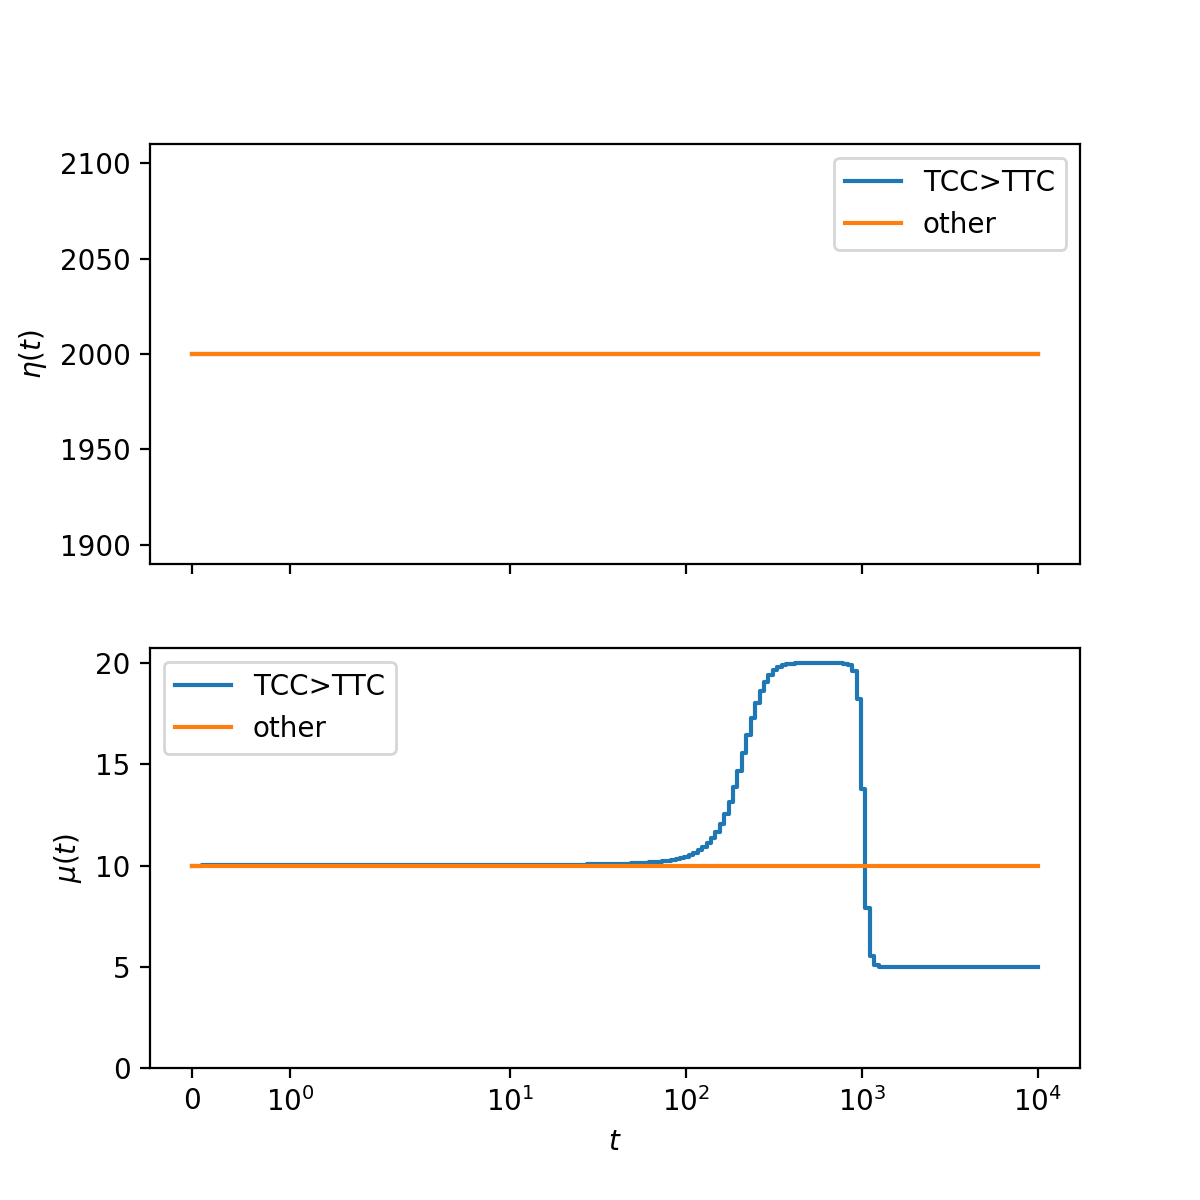

In [4]:
t = np.logspace(-1, 4, 200)

y = 2000 * np.ones(len(t) + 1)
η = PiecewiseConstantHistory(t, y)

z_flat = np.ones(len(t) + 1)
z_pulse = np.ones(len(t) + 1)
# z_pulse[:-1] += expit(-.01 * (t - 200))
z_pulse[1:] += expit(.03 * (t - 200)) - 1.5 * expit(.03 * (t - 1000))
μ_TCC = PiecewiseConstantHistory(t, 10 * z_pulse)
μ_other = PiecewiseConstantHistory(t, 10 * z_flat)

history_TCC = JointHistory(η, μ_TCC)
history_other = JointHistory(η, μ_other)

fig = history_TCC.plot(label='TCC>TTC')
history_other.plot(fig=fig, label='other')
plt.show()

### SFS

In [5]:
n = 275
sfs_TCC = SFS(n)
sfs_other = SFS(n)
sfs_TCC.simulate(history_TCC)
sfs_other.simulate(JointHistory(η, μ_other))

### Invert the `TCC>TTC` SFS conditioned on $\eta(t)$ to get $\mu(t)$

<IPython.core.display.Javascript object>


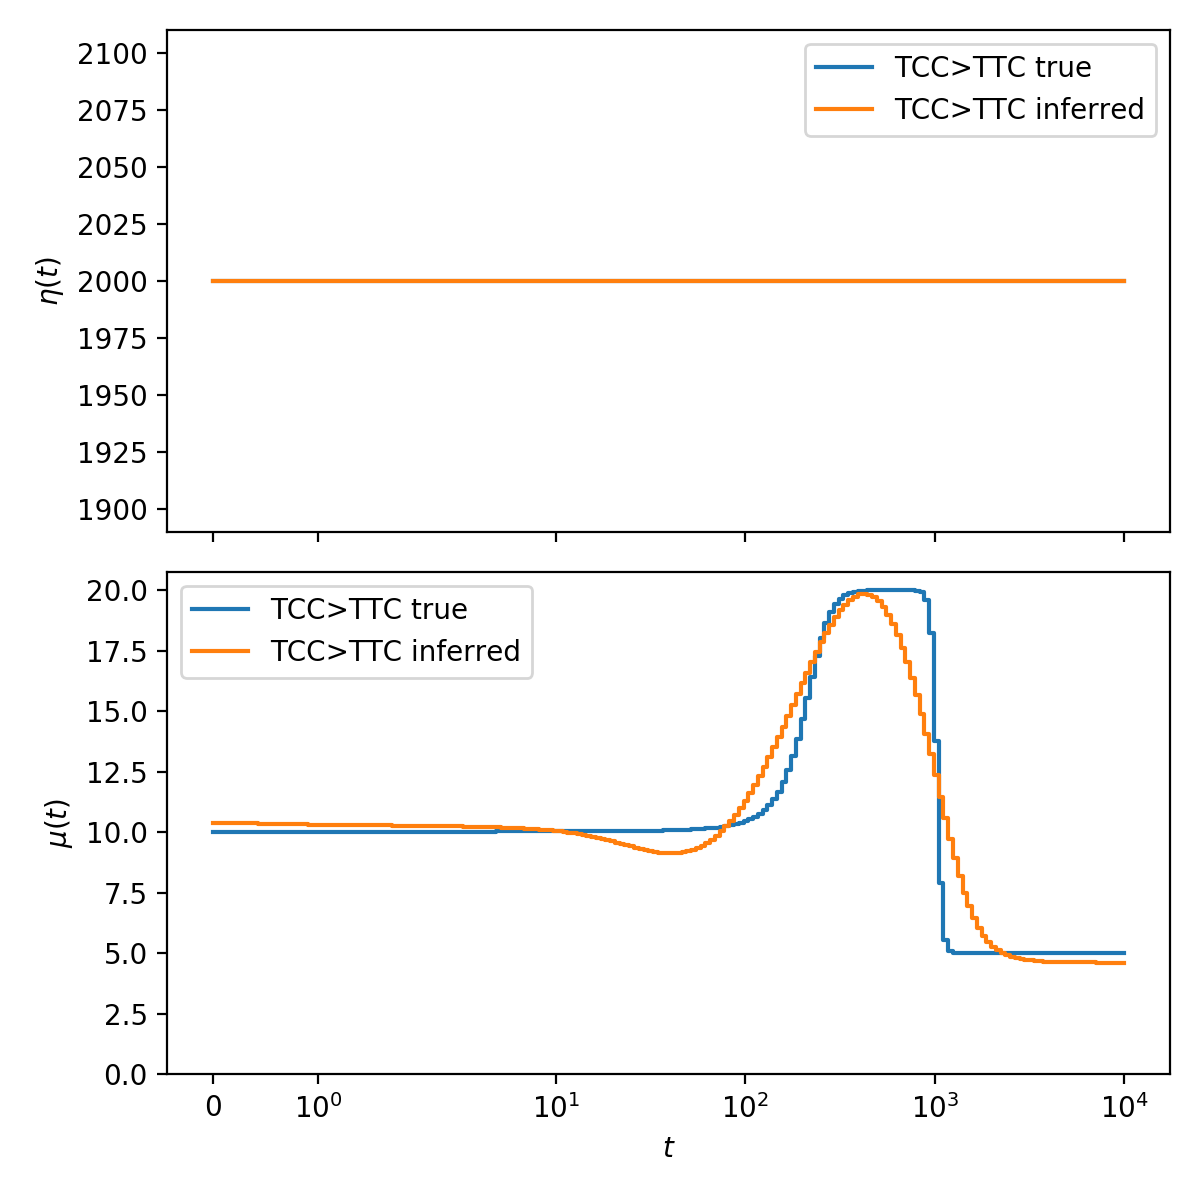

<IPython.core.display.Javascript object>


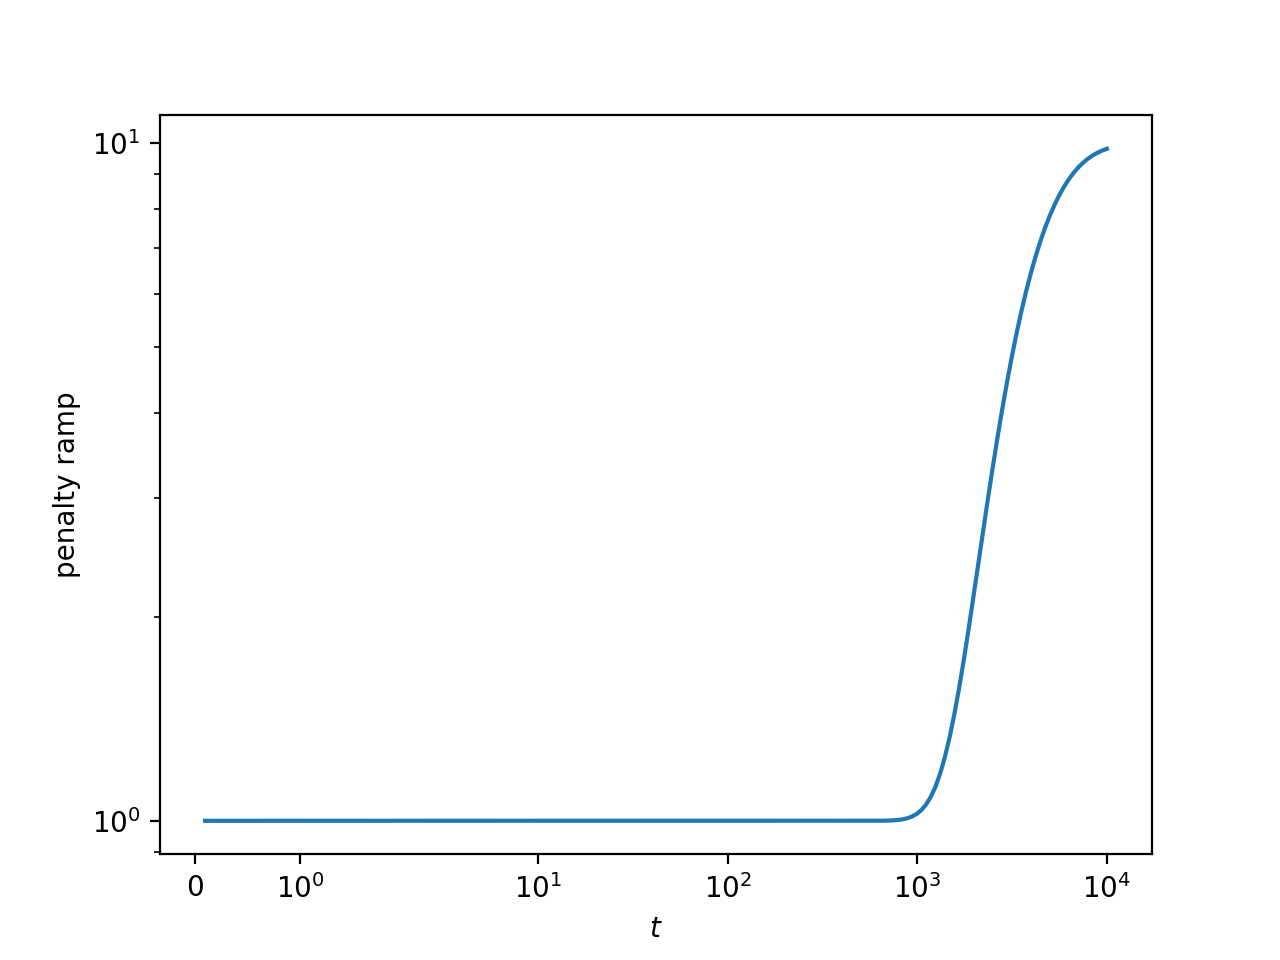

<IPython.core.display.Javascript object>


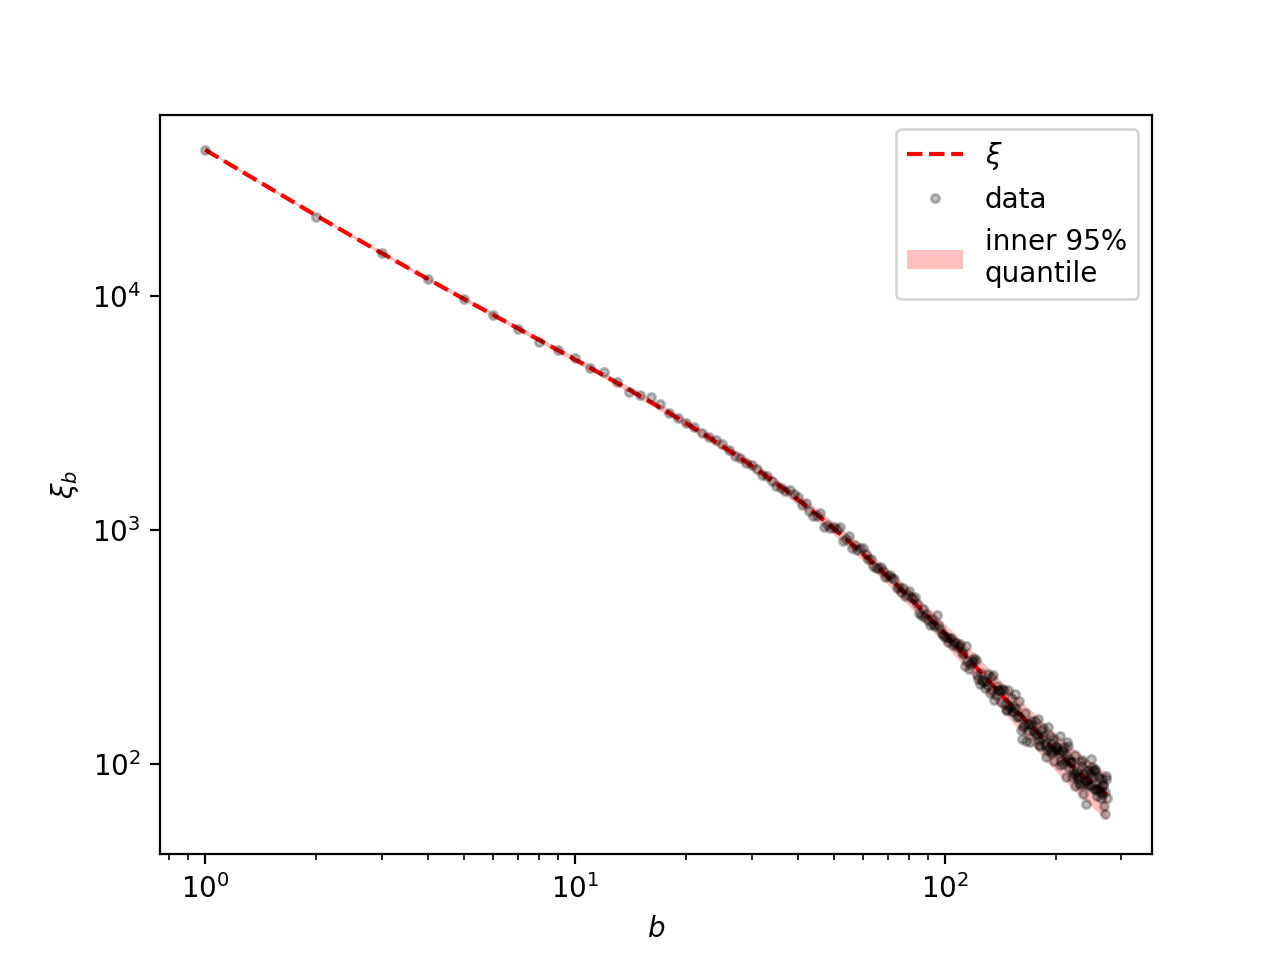

In [9]:
λ_μ = 1e1
h = 1e1
history_inferred = sfs_TCC.infer_μ(η, λ_μ=λ_μ, h=h)

fig = history_TCC.plot(label='TCC>TTC true')
history_inferred.plot(fig=fig, label='TCC>TTC inferred')
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(η.change_points, np.diag(sfs_TCC.Γ(η, h=h))[1:])
plt.xlabel('$t$')
plt.xscale('symlog')
plt.yscale('log')
plt.ylabel('penalty ramp')
plt.show()

plt.figure()
sfs_TCC.plot(JointHistory(η, μ_TCC))
plt.show()